In [ ]:
b

['montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'montagne', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'ville', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'riviere', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'frui

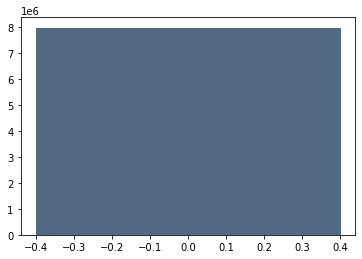

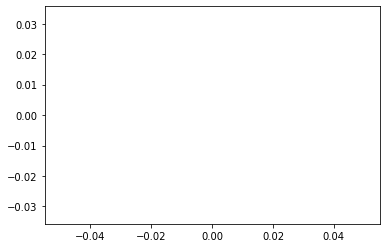

yellowgreen


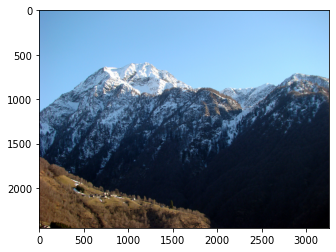

images/image99.jpg
montagne


KeyboardInterrupt: ignored

In [14]:
! pip install webcolors
from sklearn import tree
import urllib.request
import json
import csv
import html
from bs4 import BeautifulSoup
from PIL import Image
import	PIL.Image

import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
import webcolors
from statistics import mean
from webcolors import rgb_to_name
import numpy as np
import pandas as pd
import graphviz
import pydotplus
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


  
with open("montagnes.html") as html_file:
  soup1 = BeautifulSoup(html_file, 'html.parser')
with open("villes.html") as html_file:
  soup2 = BeautifulSoup(html_file, 'html.parser')
with open("riviere.html") as html_file:
  soup3 = BeautifulSoup(html_file, 'html.parser')
with open("fruit.html") as html_file:
  soup4 = BeautifulSoup(html_file, 'html.parser')



def exif (i,Tab_link):
  img = PIL.Image.open("images/image{}.jpg".format(i))
  exif_data = img._getexif()
  print(exif_data)
  return exif_data

#On donne à chaque image le tag qui lui convient
tab_image=[]
tag=[]
for i in range(100):
  tab_image.append( "images/image"+str(i)+".jpg")
  if 0<=i<=29:
    tag.append('montagne')
  elif 30<=i<=59:
    tag.append('ville')
  elif 60<=i<=79:
    tag.append('riviere')
  else:
    tag.append('fruit')
  
print(tag)
image_tag=dict(zip(tab_image, tag))
print(image_tag)

def download (i,Tab_link,folder):
    filename ='image{}.jpg'.format(i)
    full_path = '{}{}'.format(folder,filename)
    url = Tab_link
    response = urllib.request.urlretrieve(url,full_path)
    return 0 

Tab_link = []
folder='images/'
for link in soup1.find_all("td"):
  Tab_link.append(link.text)
for link in soup2.find_all("td"):
  Tab_link.append(link.text)
for link in soup3.find_all("td"):
  Tab_link.append(link.text)
for link in soup4.find_all("td"):
  Tab_link.append(link.text)
for i in range (len(Tab_link)):
  download(i,Tab_link[i],folder)

def couleurDominante(img):
  nb_cluster = 1 # Nombre de cluster defini par l'utilisateur
  
  numarray = numpy.array(img.getdata(), numpy.uint8)
  clusters = KMeans(n_clusters = nb_cluster)
  clusters.fit(numarray)
  npbins = numpy.arange(0, nb_cluster+1)
  histogram = numpy.histogram(clusters.labels_, bins=npbins)
  labels = numpy.unique(clusters.labels_)
  histogram[0].sort() # On trie selon les valeurs des frq. des couleurs
  barlist = plot.bar(labels, histogram[0])
  size = []
  somme = histogram[0].sum()
  for j in range(nb_cluster):
      size.append((histogram[0][j]/somme) * 360) #On transforme les % en degrés

  for i in range(nb_cluster):
      barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),   math.ceil(clusters.cluster_centers_[i][1]),math.ceil(clusters.cluster_centers_[i][2])))
  plot.show()
  for i in range(nb_cluster):
      liste_couleur=('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),   math.ceil(clusters.cluster_centers_[i][1]),math.ceil(clusters.cluster_centers_[i][2])))

  plot.axis('equal')
  plot.show()
#conversion de couleur en hexadécimal à nom couleur python
  for  key,name in CSS3_HEX_TO_NAMES.items():
          key=liste_couleur

  print(name)
  return(name)


user1=[]
user2=[]
user3=[]
users=[user1,user2,user3]
table=[]
list_couleur=[]
result=[]
data1=[]
data=[]
data2=[]
imagesuser1=[]
imagesuser2=[]
imagesuser3=[]
imageusers=[imagesuser1,imagesuser2,imagesuser3]
imageArecommande=[]
tabBalise=[]

#on demande à l'utilisateur de choisir des images d'une maniére aléatoire
def choisirimage(user,imageuser):
    for i in range(4): #demander à l'utilisateur de choisir 4ne images
      n=input("choisissez des numéros de 0 à 29 puis de 30 à 59 puis de 60 à 79 puis de 80 à 99 pour sélectionner des images:") 
      imageuser.append("images/image{}.jpg".format(n)) #liste des images que l'utilisateur a choisi
    print(imageuser)
    return (imageuser)


def choix(image):
  choix = input ( ' Vous aimez cette image?[oui ou non] ')
 #choix de l'utilisateur stocké dans la liste result
  if choix == "oui":
    result.append('Favorite')
  else:
    result.append('NotFavorite')
  return(result)

#on récupère les données à analyser
def donnees(img,data1):
  imagefichier = Image.open(img)
  couleur_dominante=couleurDominante(imagefichier)
  #afficher l'image pour l"utilisateur
  plot.imshow(imagefichier)
  plot.show()
  #demander à l'uilisateur de taguer une image
  for key,value in image_tag.items():
    if key==img:
      tags=value
  print(tags)
  donnee=np.array(imagefichier.getdata())
  list_couleur.append(donnee)
  balise=input("ajoutez une balise pour cette image:")
  tabBalise.append(balise)
  #definir la taille d'une image
  size=imagefichier.size
  if size < (300,400):
    taille="thumbnail"
  if (300,400) < size <(800,600):
    taille="medium"
  if size >(800,600):
    taille="large"

  data1.append([taille,tags,couleur_dominante,balise])     
  print(data1) #liste des données de l'image
  return(data1)

def analyse(user,imageuser):
  image=choisirimage(user,imageuser) #appeler la fonction pour avoir la liste des images choisies par l'utilisateur
  
  for i in image:
    
    donnees(i,data1)
    result=choix(i)
  print(data1)

#On commence avec l'utilisateur 1
analyse(user1,imagesuser1)

#Nous allons construire un classificateur d'arbre de décision avec ces données

#creating dataframes
dataframe = pd.DataFrame(data1, columns=['size', 'tag','color','balise']) 
resultframe = pd.DataFrame(result, columns=['favorite'])
#generating numerical labels
le1 = LabelEncoder()
dataframe['size'] = le1.fit_transform(dataframe['size'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['color'] = le3.fit_transform(dataframe['color'])

le4 = LabelEncoder()
dataframe['balise'] = le4.fit_transform(dataframe['balise'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])



#arbre de décision

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                  random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())
#prediction
imageApredire=['images/image0.jpg','images/image35.jpg','images/image85.jpg'] #liste des images à prédire (on a choisi que 3 images pour le test par contre on peut parcourir tout le dossier images)
for img in imageApredire:
  print(img)
  image=img
  data2=donnees(img,data2)
for i in range(len(imageApredire)):
  prediction = rfc.predict([
          [le1.transform([data2[i][0]])[0], le2.transform([data2[i][1]])[0],
          le3.transform([data2[i][2]])[0],le1.transform([data2[i][3]])[0]]])
  print(le5.inverse_transform(prediction))
  print(rfc.feature_importances_)
  if le5.inverse_transform(prediction)=='Favorite':
    imageArecommande.append(image)
  print("la liste des images à recommmander a l'utilisateur:",imageArecommande)











# Nouvelle section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')